## Inequality from fariness

Fairness, equity, and objectivity are all traits that communities strive to achieve - and rightly so. But it is surprising how even the most level of playing fields can quickly give rise to vastly different outcomes across individuals.

We can use an illustrative, albeit simplistic, example to demonstrate this principle. Let's say 100 people are playing a game. In this game, each person is given 100 coins and in every round of the game, each player is matched with another random player. When these two players commence the game, the players both flip their coins. If one player gets head and the other gets tail, the player who tossed the head takes both coins. Else, each player just keeps his or her coin and waits for the next round.

This sounds like a pretty fair and reasonable game - the probability that a player in a pair will gain or lose a coin is 50%. The history of past coin flips nor the player's current coin stack has any impact on the game being played right now.

So if this game were played 100 times, 1000 times, or even 10000 times, what would the distribution of coin stacks look like? Would they just fluctuate around the 100 coin mark?

First, let's create a player. He or she starts with 100 coins, and the player can play with another player. When this player does play, he or she tosses a coin (0 - Tails, 1 - Heads), and depending on the outcome of the tosses, each player's coin stack is updated.

In [209]:
import random
random.seed(100)

class player:
    def __init__(self, coins):
        self.coins = coins
        
    def toss(self):
        return(random.randint(0, 1))
    
    def play(self, another_player):
        player_toss = self.toss()
        another_player_toss = another_player.toss()
        
        if player_toss > another_player_toss:
            self.coins += 1
            another_player.coins -= 1
        
        if player_toss < another_player_toss:
            self.coins -= 1
            another_player.coins += 1

Next, let's define a game. Each game starts with some number of players and each time they play a round, that game's round number goes up. Since we have already defined a round, we can simply run a round until the round number reaches our desired threshold.

Finally, we can add a method that creates a histogram of the players' coin stacks.

In [210]:
import matplotlib.pyplot as plt

class game:
    def __init__(self):
        self.round_number = 0
        
    def play_round(self, player_list):
        
        round_pair = []
        player_ind = list(range(len(player_list)))
        random.shuffle(player_ind)
        
        for ind_1,ind_2 in zip(player_ind[::2], player_ind[1::2]):
            round_pair.append([player_list[ind_1],player_list[ind_2]])
        
        for pair in round_pair:
            player_1 = pair[0]
            player_2 = pair[1]
            
            player_1.play(player_2)
        
        self.round_number += 1
    
    def play_until(self, thres, player_list):
        
        while self.round_number != thres:
            self.play_round(player_list)
    
    def plot(self, player_list):
        
        unsorted_stacks = []
        for player in player_list:
            unsorted_stacks.append(player.coins)
        
        sorted_stacks = sorted(unsorted_stacks)
        
        plt.figure(self.round_number)
        plt.hist(sorted_stacks)
        plt.xlabel('Player Coin Stack')
        plt.ylabel('Count')

So we can finally simulate a game with 100 players playing 100 rounds.

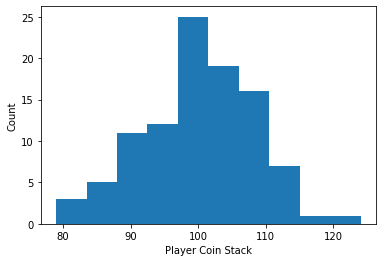

In [211]:
def simulate(players,rounds):
    sim_players = [player(100) for _ in range(players)]
    
    sim_game = game()
    sim_game.play_until(rounds, sim_players)
    sim_game.plot(sim_players)

simulate(100,100)

After 100 rounds, seems like most players are indeed around 100 coins deep. For how long can this be the case?

We can try to answer this question by simulating 1000 rounds and 10000 rounds.

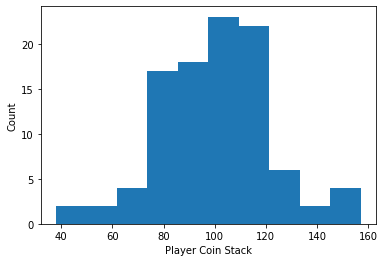

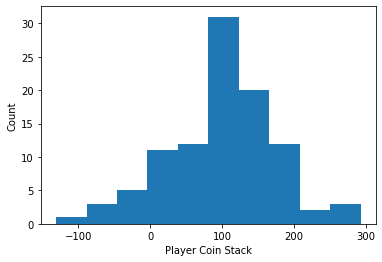

In [212]:
simulate(100,1000)
simulate(100,10000)

In the 10000 rounds case, we have already observed negative coin stacks. Let's revisit the game class' play_round method so that we don't play anymore as soon as any player reaches 0 coins. We can also modify the play_until method and the simulate function as well so that we can keep track of when the game had its first player with no coins.

In [213]:
class game:
    def __init__(self):
        self.round_number = 0
        
    def play_round(self, player_list):
        
        ###
        coin_stacks = set()
        for player in player_list:
            coin_stacks.add(player.coins)
        
        if 0 in coin_stacks:
            return self.round_number
        ###
        
        round_pair = []
        player_ind = list(range(len(player_list)))
        random.shuffle(player_ind)
        
        for ind_1,ind_2 in zip(player_ind[::2], player_ind[1::2]):
            round_pair.append([player_list[ind_1],player_list[ind_2]])
        
        for pair in round_pair:
            player_1 = pair[0]
            player_2 = pair[1]
            
            player_1.play(player_2)
        
        self.round_number += 1
    
    def play_until(self, thres, player_list):
        
        ###
        while self.round_number != thres:
            check = self.play_round(player_list)
            if check != None:
                return check
        ###
    
    def plot(self, player_list):
        
        unsorted_stacks = []
        for player in player_list:
            unsorted_stacks.append(player.coins)
        
        sorted_stacks = sorted(unsorted_stacks)
        
        plt.figure(self.round_number)
        plt.hist(sorted_stacks)
        plt.xlabel('Player Coin Stack')
        plt.ylabel('Count')

def simulate(players,rounds):
    sim_players = [player(100) for _ in range(players)]
    
    sim_game = game()
    first_zero = sim_game.play_until(rounds, sim_players)
    sim_game.plot(sim_players)
    print(first_zero)

4043


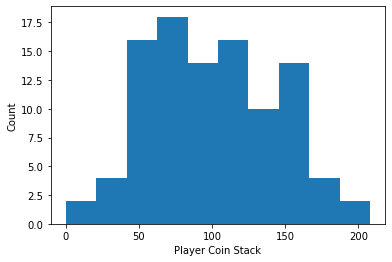

In [214]:
simulate(100,10000)

So by round 4043, we already had at least one player go bust. A natural extension from this observation is how many rounds on average are required for at least one player to bust. We can add a new method to the game class and define a new function simulate_busts to answer this question.

In [215]:
class game:
    def __init__(self):
        self.round_number = 0
        
    def play_round(self, player_list):

        coin_stacks = set()
        for player in player_list:
            coin_stacks.add(player.coins)
        
        if 0 in coin_stacks:
            return self.round_number

        round_pair = []
        player_ind = list(range(len(player_list)))
        random.shuffle(player_ind)
        
        for ind_1,ind_2 in zip(player_ind[::2], player_ind[1::2]):
            round_pair.append([player_list[ind_1],player_list[ind_2]])
        
        for pair in round_pair:
            player_1 = pair[0]
            player_2 = pair[1]
            
            player_1.play(player_2)
        
        self.round_number += 1
    
    def play_until(self, thres, player_list):

        while self.round_number != thres:
            check = self.play_round(player_list)
            if check != None:
                return check

    def plot(self, player_list):
        
        unsorted_stacks = []
        for player in player_list:
            unsorted_stacks.append(player.coins)
        
        sorted_stacks = sorted(unsorted_stacks)
        
        plt.figure(self.round_number)
        plt.hist(sorted_stacks)
        plt.xlabel('Player Coin Stack')
        plt.ylabel('Count')
        
    def play_until_bust(self, player_list, max_round = 1000000):
        
        at_round = None
        while at_round == None:
            at_round = self.play_round(player_list)
            if self.round_number == max_round:
                return
        
        return at_round

def simulate_busts(no_of_players, no_of_busts):
    
    busts = []
    
    while len(busts) != no_of_busts:
        sim_players = [player(100) for _ in range(no_of_players)]

        sim_game = game()
        first_zero = sim_game.play_until_bust(sim_players)
        busts.append(first_zero)

    plt.hist(busts)
    plt.xlabel('Rounds until first bust')
    plt.ylabel('Count')

We add a max_round constraint so that we don't endlessly iterate through rounds (however unlikely that may be). So selecting100 players, we can simulate 1000 games and record at what round at least one player goes bust.

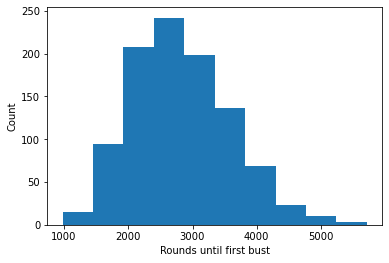

In [216]:
simulate_busts(100, 1000)

Interestingly, even with as few as 1000 rounds, someone can go bust. If each round is 1 day, that means in one iteration, in a little under 3 years, a player participating in what seems to be a "fair" game went bust. Of course "fair" in this context simply refers to the independence between each coin toss - the outcome can hardly be described as so. This exercise goes to show that even if the playing field is level, outcomes can become bifurcated quite quickly. While enforcing equality of outcome is not an absolute solution either, being cognizant of the fact that equality of opportunity oftentimes is insufficient could be an interesting thought to ponder and explore.